# Fundamentos Matemáticos - MUVA 2021/2022

## Clase I - Operaciones básicas con Numpy en Python

Copiamos la carpeta de imágenes desde el repositorio

In [1]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 94 (delta 21), reused 85 (delta 14), pack-reused 0
Receiving objects: 100% (94/94), 11.38 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Crear una matriz con valores aleatorios y representarla

In [3]:
m, n = 52, 34
A = np.random.rand(m,n)
A.shape

(52, 34)

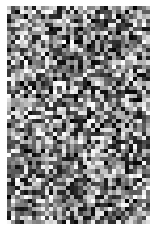

In [4]:
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()

# Ejercicio 1: Producto de matrices

En general es recomendable usar ```numpy.array``` para operar con matrices. El uso de ```numpy.matrix``` solo contempla matrices 2D.

Se diferencia de ```numpy.array``` en que el producto ```*``` corresponde a la multiplicación matricial y no de hadamard.

Es decir:

``` np.matrix(A)*np.matrix(B) = np.matmul(np.array(A), np.array(B)) ```

In [5]:
A = np.array([[1, 2], [3, 4]]) # Matrix de 2x2: primera fila [1, 2], segunda fila [3, 4]
B = np.array([[2, 0], [1, -1]])

#% producto de matrices: no conmutativo
P1 = np.matmul(A, B)
P2 = np.matmul(B, A)

# % producto de hadamard (pointwise): conmutativo
P_had1 = A*B
P_had2 = B*A

In [6]:
P1

array([[ 4, -2],
       [10, -4]])

In [7]:
P2

array([[ 2,  4],
       [-2, -2]])

In [8]:
P_had1

array([[ 2,  0],
       [ 3, -4]])

In [9]:
P_had2

array([[ 2,  0],
       [ 3, -4]])

# Ejercicio 1.1 leer una imagen en escala de grises, almacenarla y visualizarla
Abrir una imagen con PIL

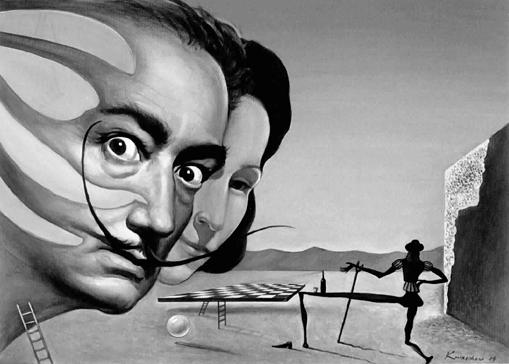

In [10]:
# pip install Pillow

from PIL import Image

path_to_image = './Images/dali-bw.jpg'
im = Image.open(path_to_image)
im

Pasamos la imagen PIL a ```numpy.array``` que será el formato con el que habitualmente trabajaremos

In [11]:
im = np.asarray(im)
im

array([[ 51,  47,  47, ..., 131, 133, 135],
       [ 62,  57,  54, ..., 130, 131, 133],
       [ 64,  59,  57, ..., 129, 130, 130],
       ...,
       [125, 126, 127, ..., 139, 143, 148],
       [121, 122, 124, ..., 134, 137, 142],
       [117, 119, 121, ..., 172, 174, 179]], dtype=uint8)

Podemos volver a convertir la imagen a formato PIL para aprovechar funcionalidades de dicha librería. Por ejemplo, al escribir la variable de la imagen como último comando ```im_pil```, nos muestra directamente por pantalla dicha imagen

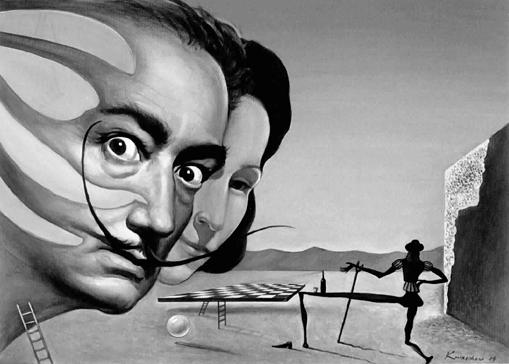

In [12]:
im_pil = Image.fromarray(im)
im_pil

También podemos usar ```matplotlib```

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

Una manera mostrar una superficie (imagen) en 3D es haciendo uso de ```plotly```

In [ ]:
# pip install plotly

import plotly.graph_objects as go

# Creamos un objeto superficie con la imagen en numpy.array (im)
data= go.Surface(z=im, colorscale='gray') 
# Creamos la figura
fig = go.Figure(data=data)
# Configuramos algunos parámetros de la figura como el título, tamaños, etc
fig.update_layout(title='Dali',
                  width=700, height=700)
# Finalmente, mostramos por pantalla
fig.show()

# Ejercicio 1.2 leer una imagen RGB, almacenarla y visualizarla por canales

In [ ]:
path_to_image = './Images/BaboonRGB.tif'
f_pil = Image.open(path_to_image)
f_pil

In [ ]:
# Pasamos a numpy
f = np.asarray(f_pil, dtype=np.float32)

# Descomponemos en canales

fR = f[:,:,0] # Red
fG = f[:,:,1] # Green
fB = f[:,:,2] # Blue

# Usamos matplotlib subplots para representarlas todas juntas

fig, axs = plt.subplots(1,3)

axs[0].imshow(fR, cmap='gray')
axs[1].imshow(fG, cmap='gray')
axs[2].imshow(fB, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

plt.show()


# Pasar de RGB a grises: una aplicacion lineal

In [ ]:
f_gray = (fR + fG + fB)/3

plt.imshow(f_gray, cmap='gray')
plt.axis('off')
plt.show()

# Ejercicio 1.3  Combinacion lineal imagen de portada

In [ ]:
A = np.asarray(Image.open('./Images/cameraman.tif'))
B = np.asarray(Image.open('./Images/baboonBW.tif'))

alpha=0.5
beta=0.5

C = alpha*A + beta*B
plt.imshow(C, cmap='gray')
plt.axis('off')
plt.show()

Propiedad de la Trasposicion

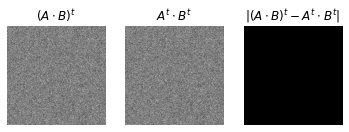

In [19]:
im_1 = np.transpose(np.matmul(A, B))

im_2 = np.matmul(np.transpose(B), np.transpose(A))

fig, axs = plt.subplots(1,3)
axs[0].imshow(im_1, cmap='gray')
axs[0].title.set_text('$(A \cdot B)^t$')
axs[0].axis('off')

axs[1].imshow(im_2, cmap='gray')
axs[1].title.set_text('$A^t \cdot B^t$')
axs[1].axis('off')

axs[2].imshow(np.abs(im_1-im_2), cmap='gray')
axs[2].title.set_text('$| (A \cdot B)^t - A^t \cdot B^t|$')
axs[2].axis('off')

plt.show()

Producto de Hadamard en imagenes

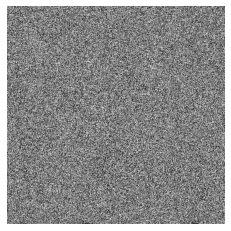

In [20]:
im_h = A*B
plt.imshow(im_h, cmap='gray')
plt.axis('off')
plt.show()

# Ejercicio propuesto nuevo 2020 
Combinacion lineal imagen en colores (por canales)

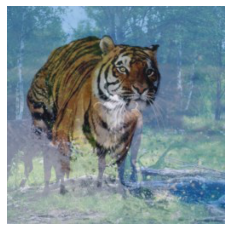

In [21]:

A = np.asarray(Image.open('./Images/vaca.jpg'))/255.0 # normalizamos al rango [0,1]
B = np.asarray(Image.open('./Images/tigre.jpg'))/255.0

# extraccion de canales
fR = np.expand_dims(A[:,:,0], -1) # Seleccionamos cada canal y conservamos la dimensión para luego concatenar
fG = np.expand_dims(A[:,:,1], -1)
fB = np.expand_dims(A[:,:,2], -1)

# extraccion de canales
gR = np.expand_dims(B[:,:,0], -1)
gG = np.expand_dims(B[:,:,1], -1)
gB = np.expand_dims(B[:,:,2], -1)

# Combinacion lineal (fusion)
alpha = 0.4
beta = 0.6

C_R = alpha*fR + beta*gR;
C_G = alpha*fG + beta*gG;
C_B = alpha*fB + beta*gB;

C_rgb = np.concatenate([C_R,C_G,C_B], axis=-1)


plt.imshow(C_rgb)
plt.axis('off')
plt.show()

# Ejercicio 1.4 Contaminacion y ruido
Añadimos un 10% de ruido (```0.1```) con respecto al máximo valor de la imagen (```f.max()```)

In [22]:
# Cargamos y pasamos a numpy.narray
f = np.asarray(Image.open('./Images/lena_bw.png'))

# Creamos el ruido
noise = f.max()*0.1*np.random.randn(*np.shape(f))

# Añadimos
fn = f + noise
fn = np.clip(fn,0,255)

# Para pasar a PIL hay primero que convertir a uint8
fn_pil = Image.fromarray(np.uint8(fn)) 

# Guardamos la imagen
fn_pil.save('./Images/noisy_lena_bw.png')
fn_pil


# 1.1.2 angulo entre vectores


In [23]:
m = 2
u = np.random.randn(m,1) 
v = np.random.randn(m,1) 

# Producto de 2 vectores
prod = np.matmul(np.transpose(u), v)
print('Prod: '+str(prod))
# Alternativamente, podemos multiplicar punto a punto y sumar
prod = np.sum(u*v)
print('Prod: '+str(prod))
# O usar numpy.dot
prod = np.dot(u.transpose(), v)
print('Prod: '+str(prod))

norma_u = np.linalg.norm(u) # por defecto, norma 2
norma_v = np.linalg.norm(v)
print('Norma_u: '+str(norma_u))
print('Norma_v: '+str(norma_v))

angulo = np.arccos(prod/(norma_u*norma_v))
print('Ángulo: '+str(angulo) + '  radianes')



Prod: [[1.85527488]]
Prod: 1.8552748765010232
Prod: [[1.85527488]]
Norma_u: 1.3253969133885126
Norma_v: 1.406335145440845
Ángulo: [[0.09652963]]  radianes


# Ejercicio 1.6 norma y producto escalar



In [24]:
u = np.array([2,1])
v = np.array([-1,3])

norma_u = np.linalg.norm(u) # por defecto, norma 2
norma_v = np.linalg.norm(v)

prod = np.sum(u*v)

angulo_rad = np.arccos(prod/(norma_u*norma_v)) # da el angulo en radianes [0,pi=3.14]
angulo_deg= np.rad2deg(angulo_rad) # =angulo_rad*180/pi
print('Ángulo: '+str(angulo_rad) + '  radianes')
print('Ángulo: '+str(angulo_deg) + '  grados')

# 1 grado=pi/180=0.0175 radianes
# 1 rad=180/pi=57.2958 grados

Ángulo: 1.4288992721907328  radianes
Ángulo: 81.86989764584403  grados


# Producto vectorial


In [25]:
u = np.array([2,1,0])
v = np.array([-1,3,4])

norma_u = np.linalg.norm(u) # por defecto, norma 2
norma_v = np.linalg.norm(v)

w = np.cross(u,v)

np.dot(u,w)==0 & np.dot(v,w)==0  # w es ortogonal tanto a u como a v, por lo que el pro

True